# Instructions

Cobify is a company dedicated to people transport just like Uber, Lyft or even Cabify (who clearly stole our name).

Cobify was founded in 1992 coinciding with the Olympic Games hosted in Barcelona. Our company has always been known by:

Not having permits to drive people (we do know how to drive)
Using tricked-out high-end car
In our home town, Barcelona, VTC licenses have appeared and we have been able to start being a legal company, because we do have licenses now. However, we still keep using tricked-out high-end cars.

We are an old school company and data analysis falls far beyond our reach, and as we do not want to be on the news we want to know how you can help our business.

A bit of history of the gas problem ⛽️
Tricked-out cars use gas with a high cetane index, like unleaded 98 petrol in order to avoid delay/advancing in combustible injection (avoiding connecting rod pitting ), but we have started to embrace petrols that add ethanol in their formula, as they are cheaper and they use the same cetane index as more expensive petrol. Without going into further detail (we could write an actual book about this) we think that going green and being modern can be very expensive, as we have seen that cars use more petrol than they used to for each trip.

Your challenge starts here 📈
Now it is your turn: can you help us find the best combustible? We have saved some consumption data in a .csv, but… it would be very nice if you could add some more data. You can find data in the repo :-)

Show us your abilities and make yourself worth the amount of money you'd like to get paid. You have 3 hours to turn the challenge in starting right now! 💸

What to do?
You should aim for:
Exploratory data analysis
Get to know the domain
Explore your data
Clean your data
Take a look and find connections between data
Note: Above you have your data set in a folder but for further reference here is the data set source: https://www.kaggle.com/datasets/anderas/car-consume

Visualization
Plot your data in a meaningful way
Predictions
Do you have any hypothesis?
Can you make any kind of prediction: regression and/or classification?
Storytelling
What metrics are you obtaining?
Explain your conclusions
Shape your new data and conclusions in such a way that is appealing to the listener and tells a story
Extra:
Enrich your dataset
Add value: obtain related data by web scraping or with APIs.
Database
Load the processed information into a database

Submission
To deliver your proposal make a fork of the repo and when you are done make a pull request. 🤯

How to do a pull request
Fork this repository
Clone it
Work on it
Push the changes to your fork
From your fork, click on Contribute
Open pull request
Name it: [Name FamilyName] Tech challenge
Do not forget to add any PDF document, slides or anything you can think of.

You can grab ideas from our instructors or create something with streamlit 🚀

Go bezerk if you want to get this job, you will set the limits!

PD: even though this has an informal tone, this challenge is serious and very similar to those you will encounter in real life.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Sklearn
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample

# Max columns_rows
pd.set_option('display.max_columns', 165)
pd.set_option('display.max_rows', 165)

# Get data

In [2]:
data = pd.read_csv('measurements.csv')

In [3]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
data_2 = pd.read_excel('measurements2.xlsx')

In [5]:
data_2

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


# Exploratory data analysis (EDA)

In [6]:
data.shape

(388, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [9]:
data_2.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [10]:
# fraction of null values
nulls_percent_df = pd.DataFrame(data_2.isna().sum()/len(data_2)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,distance,0.000000
1,consume,0.000000
2,speed,0.000000
3,temp_inside,0.030928
4,temp_outside,0.000000
5,specials,0.760309
6,gas_type,0.000000
7,AC,0.000000
8,rain,0.000000
9,sun,0.000000


In [11]:
# columns with null values more than 75%
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.75]
columns_above_threshold['column_name']

5          specials
10    refill liters
11       refill gas
Name: column_name, dtype: object

In [12]:
# columns with null values more than 75%
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['specials', 'refill liters', 'refill gas']


In [13]:
len(drop_columns_list)

3

In [14]:
data_2 = data_2.drop(columns=drop_columns_list)
data_2

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [15]:
data_2.isna().sum()/len(data_2)

distance        0.000000
consume         0.000000
speed           0.000000
temp_inside     0.030928
temp_outside    0.000000
gas_type        0.000000
AC              0.000000
rain            0.000000
sun             0.000000
dtype: float64

In [16]:
# replacement of null values with mean of the column
data_2['temp_inside'] = data_2['temp_inside'].fillna(np.mean(data_2['temp_inside']))


In [17]:
# we are done with the null values.
data_2.isna().sum()/len(data_2)

distance        0.0
consume         0.0
speed           0.0
temp_inside     0.0
temp_outside    0.0
gas_type        0.0
AC              0.0
rain            0.0
sun             0.0
dtype: float64

In [18]:
# column names
data_2.columns
column_names = data_2.columns
column_names

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'gas_type', 'AC', 'rain', 'sun'],
      dtype='object')

In [19]:
# replace underscores in column titles
cols = []
for column in data_2.columns:
    cols.append(column.lower().replace(' ','_'))
cols
data_2.columns = cols

data_2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


# Data Visualization

In [20]:
# break dataset into numericals and categoricals
numerical = data_2.select_dtypes(include = np.number)
categorical = data_2.select_dtypes(include = object)

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


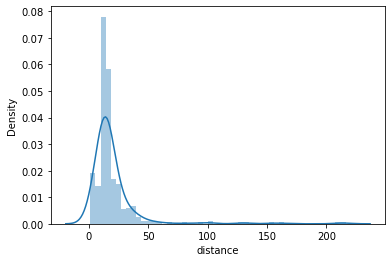

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


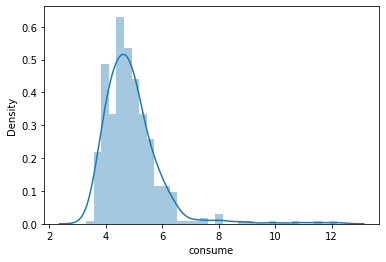

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


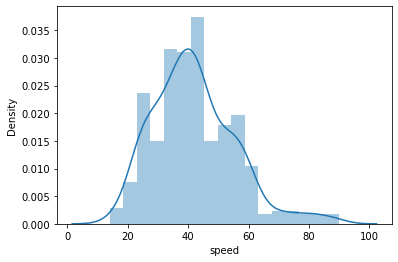

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


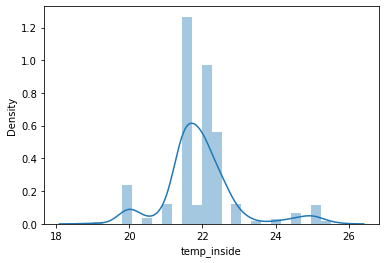

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


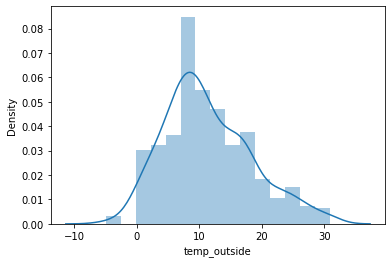

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


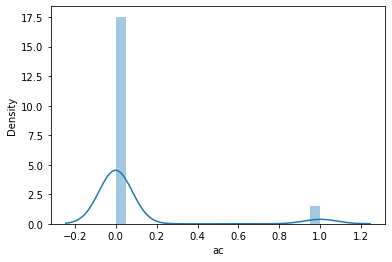

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


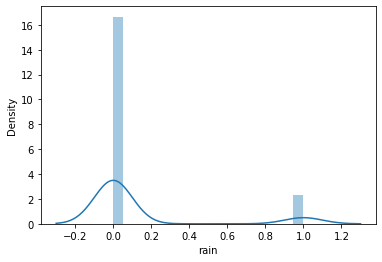

/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


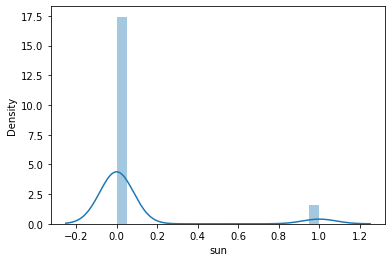

In [21]:
def plot_num(df):
    for col in df.columns:
        sns.distplot(a=df[col])
        plt.show()
    return None

plot_num(numerical)

# Checking / Removing outliers

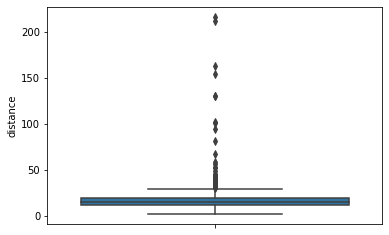

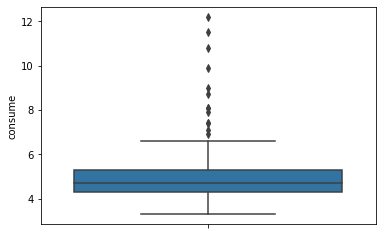

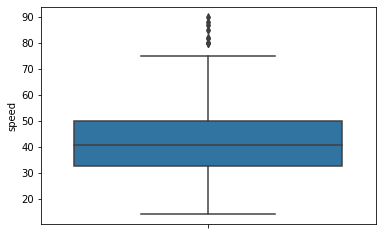

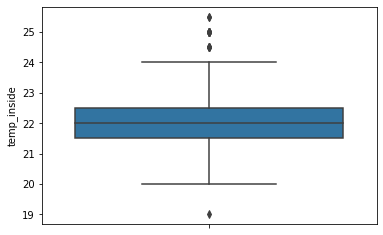

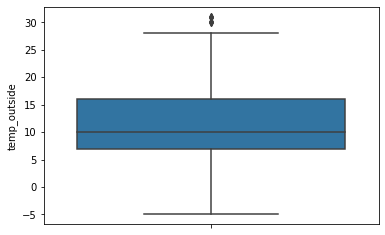

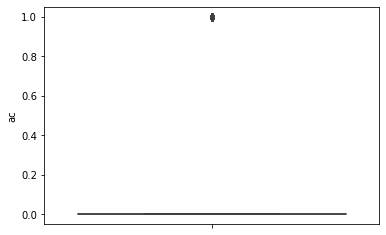

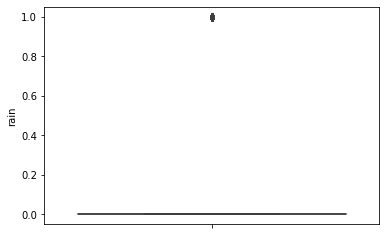

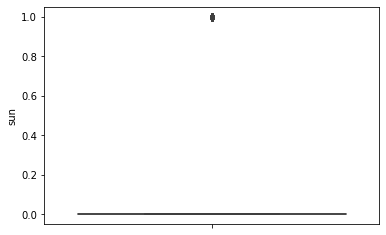

In [22]:
def outlier(df):
    for col in df.columns:
        sns.boxplot(y=df[col])
        plt.show()
    return None

outlier(numerical)

In [23]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_inside,388.0,21.929521,0.994666,19.0,21.50,22.0,22.5,25.5
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
ac,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [24]:
numerical.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'ac',
       'rain', 'sun'],
      dtype='object')

In [25]:
def value_count(df):
    for column in df.columns:
        print(column, ":", len(df[column].unique())) # number of unique value for each column
    
value_count(numerical)

distance : 174
consume : 43
speed : 60
temp_inside : 14
temp_outside : 33
ac : 2
rain : 2
sun : 2


In [26]:
print("Old shape: ", numerical.shape)

Old shape:  (388, 8)


In [27]:
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean())/column.var()**(1/2))) > threshold]
    
    return data

In [28]:
distance_outliers = outliers(numerical["distance"])
consume_outliers = outliers(numerical["consume"])

In [29]:
len(distance_outliers)

9

In [30]:
len(consume_outliers)

8

In [31]:
distance_outliers

55     153.5
106    162.7
189    130.3
272    101.9
273     93.9
318    211.0
319    216.1
333    100.9
334    129.7
Name: distance, dtype: float64

In [32]:
consume_outliers

45      9.9
61     12.2
112     8.7
147    10.8
160     8.1
206     9.0
210    11.5
254     8.1
Name: consume, dtype: float64

In [33]:
data_2.shape

(388, 9)

In [34]:
numerical.shape

(388, 8)

In [35]:
categorical.shape

(388, 1)

In [36]:
to_drop = distance_outliers.index | consume_outliers.index

/var/folders/tr/nqbjf62d721fqy35q732j79m0000gn/T/ipykernel_5051/2025370576.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  to_drop = distance_outliers.index | consume_outliers.index


In [37]:
clean_numerical = numerical.drop(to_drop).reset_index(drop = True)
clean_numerical.isna().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
ac              0
rain            0
sun             0
dtype: int64

In [38]:
clean_numerical

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
366,16.0,3.7,39,24.5,18,0,0,0
367,16.1,4.3,38,25.0,31,1,0,0
368,16.0,3.8,45,25.0,19,0,0,0
369,15.4,4.6,42,25.0,31,1,0,0


In [39]:
clean_numerical.iloc[:,0:9].round(2)

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
366,16.0,3.7,39,24.5,18,0,0,0
367,16.1,4.3,38,25.0,31,1,0,0
368,16.0,3.8,45,25.0,19,0,0,0
369,15.4,4.6,42,25.0,31,1,0,0


In [40]:
print("New shape: ",clean_numerical.shape)

New shape:  (371, 8)


In [41]:
# Categorical dataframe
clean_categorical = categorical.drop(to_drop).reset_index(drop = True)

In [42]:
clean_categorical.shape

(371, 1)

In [43]:
data_2_clean = pd.concat([clean_categorical, clean_numerical.iloc[:,0:11].round(2)], axis=1)
data_2_clean.shape

(371, 9)

In [44]:
data_2_clean.head()

,gas_type,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,E10,28.0,5.0,26,21.5,12,0,0,0
1,E10,12.0,4.2,30,21.5,13,0,0,0
2,E10,11.2,5.5,38,21.5,15,0,0,0
3,E10,12.9,3.9,36,21.5,14,0,0,0
4,E10,18.5,4.5,46,21.5,15,0,0,0


In [45]:
data_2_clean.tail(5)

,gas_type,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
366,SP98,16.0,3.7,39,24.5,18,0,0,0
367,SP98,16.1,4.3,38,25.0,31,1,0,0
368,SP98,16.0,3.8,45,25.0,19,0,0,0
369,SP98,15.4,4.6,42,25.0,31,1,0,0
370,SP98,14.7,5.0,25,25.0,30,1,0,0


In [46]:
data_2_clean.dtypes

gas_type         object
distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
ac                int64
rain              int64
sun               int64
dtype: object

In [47]:
data = data_2_clean

In [48]:
data['gas_type'].value_counts()

SP98    219
E10     152
Name: gas_type, dtype: int64

# X/y split

In [49]:
# standardization of independent variables
# separate the target column which is gas_type
X = data.drop(['gas_type'],axis = 1)
y = data['gas_type']

# Correlation matrix

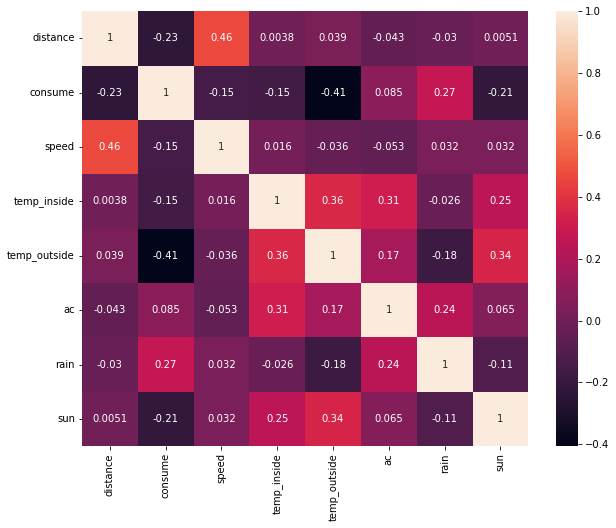

In [50]:
# No collinearity: we do not need to remove any column.
correlations_matrix = X.corr()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations_matrix, annot=True, annot_kws={'fontsize': 10})
plt.show()

# Train test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standard Scaler

In [52]:
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,-0.505431,-0.266410,-0.049454,-0.428227,-0.789584,-0.310316,-0.377964,-0.310316
1,0.353429,-0.961801,-0.293425,0.054466,1.312187,-0.310316,-0.377964,-0.310316
2,-1.247175,1.124372,-0.781368,0.054466,0.891833,-0.310316,-0.377964,-0.310316
3,-0.095521,-1.518114,0.275841,0.054466,0.751715,-0.310316,-0.377964,-0.310316
4,-0.290716,0.289903,-0.049454,0.537159,-0.509348,-0.310316,-0.377964,-0.310316


In [53]:
y_train.head()

63     SP98
284    SP98
260     E10
320     E10
248     E10
Name: gas_type, dtype: object

In [54]:
# Transformation also reset the index for X_train_scaled so we need this for y_test as well...
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [55]:
y_train.head()

0    SP98
1    SP98
2     E10
3     E10
4     E10
Name: gas_type, dtype: object

In [56]:
y_train.shape

(296,)

# Linear relation on logit 

In [57]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [58]:
LR.predict_proba(X_train_scaled)
#for each set of features you try to predict, you get probability of zero, one.

array([[0.48672415, 0.51327585],
       [0.29194027, 0.70805973],
       [0.2575903 , 0.7424097 ],
       [0.34944735, 0.65055265],
       [0.50283201, 0.49716799],
       [0.67343103, 0.32656897],
       [0.58034578, 0.41965422],
       [0.38083148, 0.61916852],
       [0.32312627, 0.67687373],
       [0.33259702, 0.66740298],
       [0.15355572, 0.84644428],
       [0.35333787, 0.64666213],
       [0.44699603, 0.55300397],
       [0.26046   , 0.73954   ],
       [0.30052407, 0.69947593],
       [0.44486402, 0.55513598],
       [0.34893096, 0.65106904],
       [0.59483055, 0.40516945],
       [0.28834492, 0.71165508],
       [0.60546933, 0.39453067],
       [0.5264226 , 0.4735774 ],
       [0.33866114, 0.66133886],
       [0.2775596 , 0.7224404 ],
       [0.36153069, 0.63846931],
       [0.55152098, 0.44847902],
       [0.47744699, 0.52255301],
       [0.12868694, 0.87131306],
       [0.38196283, 0.61803717],
       [0.57078545, 0.42921455],
       [0.41175954, 0.58824046],
       [0.

In [59]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

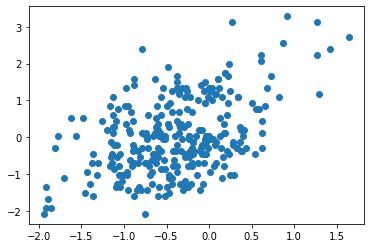

In [60]:
plt.scatter(logits,X_train_scaled['speed'])

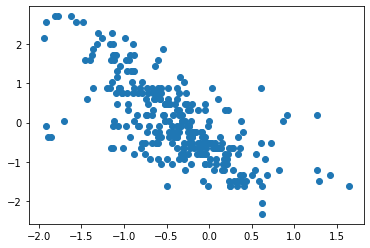

In [61]:
plt.scatter(logits,X_train_scaled['temp_outside'])

<AxesSubplot:>

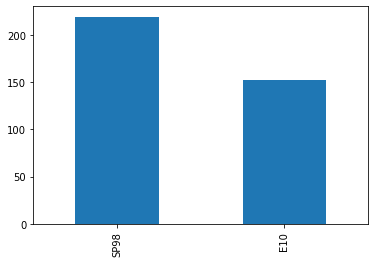

In [62]:
count_classes = data['gas_type'].value_counts()
count_classes
count_classes.plot(kind = 'bar')


# we reuse some rows in minority class. That's called oversampling.
# we do not use samples from majority class. That's called downsampling.

# Balanced data: both classes we classify have same probability to occur.
# Imbalanced data: classes have difference in probability to occur.

# Logistic regression model

In [63]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
print(LR.score(X_train_scaled, y_train))
print(LR.score(X_test_scaled, y_test))

0.6418918918918919
0.5733333333333334


In [64]:
X_train_scaled.shape

(296, 8)

In [65]:
y_train.shape

(296,)

In [66]:
pred = LR.predict(X_test_scaled)

print('accuracy:', accuracy_score(y_test, pred))
print("precision: ",precision_score(y_test,pred, pos_label='SP98')) # if we predicted that was a positive cases, how often it was true 
print("recall: ",recall_score(y_test,pred, pos_label='SP98')) # number of positive cases we correctly predict as positive
print("f1: ",f1_score(y_test,pred, pos_label='SP98')) # 2*(precision-recall)/(precision+recall)


# The PRECISION is the ratio tp / (tp + fp) where tp is the number of true positives and 
# fp the number of false positives. The precision is intuitively the ability of the classifier not to 
# label as positive a sample that is negative.

# The RECALL is the ratio tp / (tp + fn) where tp is the number of true positives and 
# fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.

# The F1 SCORE can be interpreted as a harmonic mean of the precision and recall.
# The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
# F1 = 2 * (precision * recall) / (precision + recall)

# The parameters reach their best value at 1 and worst score at 0. 

accuracy: 0.5733333333333334
precision:  0.6226415094339622
recall:  0.7333333333333333
f1:  0.673469387755102


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


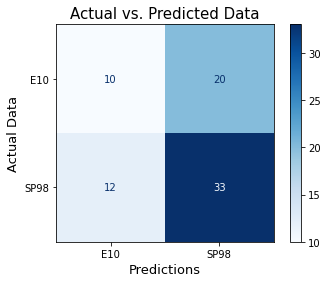

In [67]:
plot_confusion_matrix(LR, X_test_scaled, y_test,cmap=plt.cm.Blues)  
plt.title('Actual vs. Predicted Data', fontsize=15)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actual Data', fontsize=13)
plt.show()

# There are 53 gas types predicted as SP98 gas type. 20 of them are E10 gas type. 33 of them are SP98 gas type. That's why precision is 0.62.
# There are 22 gas types predicted as E10 gas type. 10 of them are E10 gas type. 12 of them are SP98 gas type.
# True positive=33, false negative=12 => recall = 0.73

# Score of logistic regression model is 0.57. Our model predicts the gas types fair based on the accuracy score and performance metrics. 

# Although SP98 gas type consumes more than E10, the cars approaches more distances with higher speed when SP98 gas type is used.
# Therefore, SP98 gas type is more preferable than E10.
# Please see the Dashboard in Tableau. The link is in readme file.


# Hyperparameter search

In [68]:
from sklearn.model_selection import GridSearchCV # cross validation
# function GridSearchCV with cross validation

max_depth_choices= [3,10,None]
min_samples_split_choices = [2,10]
min_samples_leaf_choices = [2,10]        

In [69]:
# Create the  grid 
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'max_depth': max_depth_choices, # dictionary where each key is name of the parameter of model that we are gonna explore
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices}

In [70]:
# Instantiate the grid search model object

# estimator -> model to optimize 
model1 = RandomForestClassifier()
# param_grid -> state the dictionary of parameters to optimize
# cv = 5 -> number of cross validation folds <------ CV is REALLY important in grid search. Why?
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 10)

In [71]:
%%time
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

CPU times: user 19.6 s, sys: 341 ms, total: 19.9 s
Wall time: 20.3 s


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 10, None],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10]})

In [72]:
grid_search.best_params_ 

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [73]:
grid_search.best_score_

0.6911494252873562

In [74]:
from sklearn.model_selection import GridSearchCV # cross validation
# function GridSearchCV with cross validation

max_depth_choices= [3,10,None]
splitter_choices=['best','random']
min_samples_split_choices = [2,10]
min_samples_leaf_choices = [2,10] 
min_weight_fraction_leaf_choices = [0.1,0.3,0.5,0.7,1]
max_features_choices = [1,3,5,7,9]

In [75]:
# Create the  grid 
# this is a dictionary from hyperparameters to potential values
# the keys in this dictionary have to match the names of the hyperparameters in the documentation of the model
grid = {'max_depth': max_depth_choices,
        'splitter': splitter_choices,
        'min_samples_split': min_samples_split_choices,
        'min_samples_leaf': min_samples_leaf_choices,
        'min_weight_fraction_leaf': min_weight_fraction_leaf_choices,
        'max_features': max_features_choices}

In [76]:
# Instantiate the grid search model object

# estimator -> model to optimize 
model2 = DecisionTreeClassifier()
# param_grid -> state the dictionary of parameters to optimize
# cv = 5 -> number of cross validation folds <------ CV is REALLY important in grid search. Why?
grid_search = GridSearchCV(estimator = model2, param_grid = grid, cv = 10)

In [77]:
%%time
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

CPU times: user 18.4 s, sys: 374 ms, total: 18.7 s
Wall time: 19.2 s


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3120 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueEr

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 10, None],
                         'max_features': [1, 3, 5, 7, 9],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [2, 10],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5, 0.7, 1],
                         'splitter': ['best', 'random']})

In [78]:
grid_search.best_params_ 

{'max_depth': None,
 'max_features': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [79]:
grid_search.best_score_

0.6749425287356323

# Model pipeline

In [80]:
model1 = RandomForestClassifier(max_depth = None, min_samples_leaf = 2, min_samples_split = 10) 
model2 = DecisionTreeClassifier(max_depth = 10, max_features = 7, min_samples_leaf = 10, min_samples_split = 2, min_weight_fraction_leaf = 0.1, splitter = 'best') 
model3 = LogisticRegression(random_state=0, solver='lbfgs')

model_pipeline = [model1, model2, model3]
model_names = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10))
    scores[model_name] = mean_score
print(scores)

{'Random Forest Classifier': 0.6810344827586207, 'Decision Tree Classifier': 0.6442528735632186, 'Logistic Regression': 0.6213793103448275}


In [81]:
list(zip(model_pipeline, model_names))

[(RandomForestClassifier(min_samples_leaf=2, min_samples_split=10),
  'Random Forest Classifier'),
 (DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=10,
                         min_weight_fraction_leaf=0.1),
  'Decision Tree Classifier'),
 (LogisticRegression(random_state=0), 'Logistic Regression')]

In [82]:
test_scores = {}

for model, model_name in zip(model_pipeline,model_names):
    model.fit(X_train_scaled, y_train)
    test_scores[model_name] = model.score(X_test_scaled,y_test)
print(test_scores)

{'Random Forest Classifier': 0.68, 'Decision Tree Classifier': 0.6666666666666666, 'Logistic Regression': 0.5733333333333334}


In [83]:
y_train.value_counts() # balanced data

SP98    174
E10     122
Name: gas_type, dtype: int64

In [84]:
print(y_test.value_counts())

SP98    45
E10     30
Name: gas_type, dtype: int64


In [87]:
# RandomForestClassifier
predictions = model1.predict(X_test_scaled)

print('accuracy:', accuracy_score(y_test, predictions))
print("precision: ", precision_score(y_test,predictions, average='weighted'))
print("recall: ", recall_score(y_test,predictions, average='weighted'))
print("f1: ", f1_score(y_test,predictions, average='weighted'))

accuracy: 0.68
precision:  0.68
recall:  0.68
f1:  0.68


/Users/ozguryildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


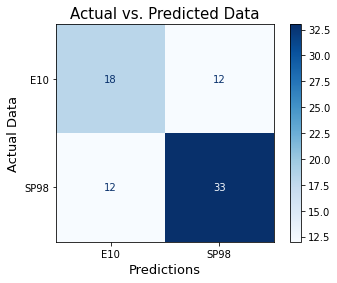

In [86]:
# RandomForestClassifier
fig_1 = plot_confusion_matrix(model1, X_test_scaled, y_test, cmap = plt.cm.Blues)
plt.title('Actual vs. Predicted Data', fontsize=15)
plt.xlabel('Predictions', fontsize=13)
plt.ylabel('Actual Data', fontsize=13)
plt.show()

# There are 45 gas types predicted as SP98 gas type. 12 of them are E10 gas type. 33 of them are SP98 gas type. That's why precision is 0.68.
# There are 30 gas types predicted as E10 gas type. 12 of them are E10 gas type. 18 of them are SP98 gas type.
# True positive=33, false negative=12 => recall = 0.68.

# The best performance comes from random forest classifier model among when compared to other models. That's why we selected random forest classifier to predict the gas types.
# Score of random forest classifier model is 0.68. Our model predicts the gas types good based on the accuracy score and performance metrics. 

# Although SP98 gas type consumes more than E10, the cars approaches more distances with higher speed when SP98 gas type is used.
# Therefore, SP98 gas type is more preferable than E10.
# Please see the Dashboard in Tableau. The link is in readme file.
